## Walsh Weather

### Observations:

1. A relationship may be infered between city position and temperature with higher temperatures found closer to the equater. Sample population skewed toward northen hemishpere. Further samplings or larger sampling may demonstrate better relationship.

2. Latitude does not seem to affect cloud cover. 

3.  There may be a possible relationship between wind speed and latitude, with increased wind speeds further from the equator, however, larger sample size would be required. 

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
#import random
import time

In [2]:
# Selecting cities from complete list of cities available from openweathermaps  http://bulk.openweathermap.org/sample/
raw_data = pd.read_json("city_list.json")
raw_city_list = raw_data[["name", 'id', "country", "coord"]]
raw_city_list.head()
#new = raw_city_list["coord"]

name       id country                                 coord
0            Hurzuf   707860      UA  {'lon': 34.283333, 'lat': 44.549999}
1           Novinki   519188      RU  {'lon': 37.666668, 'lat': 55.683334}
2            Gorkhā  1283378      NP         {'lon': 84.633331, 'lat': 28}
3  State of Haryāna  1270260      IN                {'lon': 76, 'lat': 29}
4         Holubynka   708546      UA  {'lon': 33.900002, 'lat': 44.599998}

In [3]:
# Get and store target url for each city in list by city name
base_url = "http://api.openweathermap.org/data/2.5/weather"
api_key = "d4c7fc687a3ecaf9670515da999f1a2b"
units = "imperial"

In [4]:
# create loop to hold target url with counters and data frame

count = 0
group = 1

# empty df created to store data. Lat and long pulled from api not original list of cities.
weather_df = pd.DataFrame(columns=["Name", "Latitude", "Longitude",
                                   "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"])


for x in range(12):
    # .sample pulls random sample from list.batched 60 because documentation specified 60 per minute.
    sample_list = raw_city_list["id"].sample(60).tolist()

    for x in sample_list:
        print(f"Processing Record {count} of Set {group}")
        target_url = base_url + "?appid=" + api_key + \
            "&units=" + units + "&id=" + str(x)
        response = requests.get(target_url).json()
        name = response["name"]
        temp = response["main"]["temp_max"]
        clouds = response["clouds"]["all"]
        humidity = response["main"]["humidity"]
        wind = response["wind"]["speed"]
        lat = response["coord"]["lat"]
        lon = response["coord"]["lon"]
        date = response["dt"]
        weather_df = weather_df.append({"Name": name, "Latitude": lat, "Longitude": lon, "Max Temp": temp,
                                        "Humidity": humidity, "Cloudiness": clouds, "Wind Speed": wind, "Date": date}, ignore_index=True)
        print(target_url)
        count += 1
    # add set number to batches
    group += 1
    # time.sleep(62)  # documents said 60 per minute, but doesn't seem to need lag

Processing Record 0 of Set 1
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6359066
Processing Record 1 of Set 1
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=5531747
Processing Record 2 of Set 1
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=7347317
Processing Record 3 of Set 1
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=1693069
Processing Record 4 of Set 1
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=1266141
Processing Record 5 of Set 1
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=5939355
Processing Record 6 of Set 1
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3175115
Processing Re

http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6552181
Processing Record 59 of Set 1
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=8057099
Processing Record 60 of Set 2
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3182852
Processing Record 61 of Set 2
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=1149903
Processing Record 62 of Set 2
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=5173048
Processing Record 63 of Set 2
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=537888
Processing Record 64 of Set 2
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3085450
Processing Record 65 of Set 2
http://

http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2658377
Processing Record 117 of Set 2
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=8014422
Processing Record 118 of Set 2
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=668104
Processing Record 119 of Set 2
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6361299
Processing Record 120 of Set 3
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=789996
Processing Record 121 of Set 3
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=664011
Processing Record 122 of Set 3
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3449112
Processing Record 123 of Set 3
ht

http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2912618
Processing Record 175 of Set 3
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=5300182
Processing Record 176 of Set 3
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=698949
Processing Record 177 of Set 3
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=1688901
Processing Record 178 of Set 3
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=223816
Processing Record 179 of Set 3
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3207698
Processing Record 180 of Set 4
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=668828
Processing Record 181 of Set 4
ht

http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3438872
Processing Record 233 of Set 4
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=1825049
Processing Record 234 of Set 4
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=1275920
Processing Record 235 of Set 4
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6455601
Processing Record 236 of Set 4
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2862365
Processing Record 237 of Set 4
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2814535
Processing Record 238 of Set 4
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2521836
Processing Record 239 of Set 4

http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2788088
Processing Record 292 of Set 5
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=4998703
Processing Record 293 of Set 5
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=7300644
Processing Record 294 of Set 5
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2917846
Processing Record 295 of Set 5
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6554950
Processing Record 296 of Set 5
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6361070
Processing Record 297 of Set 5
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2638490
Processing Record 298 of Set 5

http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2523688
Processing Record 351 of Set 6
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6358361
Processing Record 352 of Set 6
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=720988
Processing Record 353 of Set 6
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2925255
Processing Record 354 of Set 6
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2661566
Processing Record 355 of Set 6
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=1838343
Processing Record 356 of Set 6
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2165331
Processing Record 357 of Set 6


http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2929642
Processing Record 409 of Set 7
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6551710
Processing Record 410 of Set 7
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6054535
Processing Record 411 of Set 7
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2894566
Processing Record 412 of Set 7
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2980883
Processing Record 413 of Set 7
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=686035
Processing Record 414 of Set 7
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2978789
Processing Record 415 of Set 7


http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2817708
Processing Record 467 of Set 8
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=1941099
Processing Record 468 of Set 8
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=7046674
Processing Record 469 of Set 8
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2274129
Processing Record 470 of Set 8
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=5218918
Processing Record 471 of Set 8
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=4941899
Processing Record 472 of Set 8
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3986228
Processing Record 473 of Set 8

http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3020818
Processing Record 525 of Set 9
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2747891
Processing Record 526 of Set 9
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2959174
Processing Record 527 of Set 9
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=7338248
Processing Record 528 of Set 9
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6355242
Processing Record 529 of Set 9
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=4261486
Processing Record 530 of Set 9
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3030760
Processing Record 531 of Set 9

http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=4762929
Processing Record 583 of Set 10
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=8013954
Processing Record 584 of Set 10
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=7871756
Processing Record 585 of Set 10
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2523877
Processing Record 586 of Set 10
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=1770847
Processing Record 587 of Set 10
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=1268754
Processing Record 588 of Set 10
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2972328
Processing Record 589 of

http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2981685
Processing Record 640 of Set 11
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2865331
Processing Record 641 of Set 11
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6947639
Processing Record 642 of Set 11
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=1798495
Processing Record 643 of Set 11
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2754454
Processing Record 644 of Set 11
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2875625
Processing Record 645 of Set 11
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=4781711
Processing Record 646 of

http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3179409
Processing Record 697 of Set 12
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6357534
Processing Record 698 of Set 12
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3699427
Processing Record 699 of Set 12
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6440537
Processing Record 700 of Set 12
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3176510
Processing Record 701 of Set 12
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2830080
Processing Record 702 of Set 12
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=7287140
Processing Record 703 of

In [5]:
weather_df.drop_duplicates()

Name  Latitude  Longitude  Max Temp Humidity  \
0                      Hormilleja     42.46      -2.73     39.20       93   
1                   Sterling City     31.84    -100.98     42.80       64   
2               Tambahrejo Krajan     -8.15     113.07     79.90       95   
3                      Polonoling      6.29     124.97     73.87      100   
4                         Koradih     21.25      79.10     98.60       22   
5                           Dilke     50.87    -105.25     30.20       92   
6                         Lardaro     45.97      10.66     46.40       70   
7                      Gullesheim     50.60       7.53     41.00       56   
8                 Dziekanow Lesny     52.35      20.85     33.80       37   
9             Niefern-Oschelbronn     48.92       8.78     37.40       47   
10                        Yuanhua     30.41     120.77     46.40       81   
11                      Esperanca     -7.03     -35.86     77.56       76   
12                      Donghenan     39.38     114.04     28.06       62   
13                         Salmon     45.18    -113.90     26.60       92   
14                    Landerrouat     44.73       0.18     39.20       60   
15                        Poblete     38.93      -4.01     43.72       72   
16                         Sadroc     45.28       1.55     37.40       64   
17                       Kingston     39.64     -94.04     37.40       59   
18                    Wusterhusen     54.12      13.62     35.60       74   
19                         Haddon    -37.60     143.72     54.79       61   
20                          Mozac     45.89       3.10     33.80       69   
21                      Kosai-shi     34.72     137.53     46.40       93   
22        La Capelle-les-Boulogne     50.73       1.70     44.60       99   
23                  Kottgeisering     48.12      11.13     32.00       63   
24      Województwo Wielkopolskie     52.25      17.00     42.80       26   
25                        Lombron     48.08       0.42     44.60       52   
26                          Kaduy     59.20      37.15     30.22       90   
27                        Nebyliv     48.82      24.22     26.60       79   
28                        Taskopa     48.85      55.58     50.65       96   
29                    Eichenhofen     48.47      10.48     32.00       89   
..                            ...       ...        ...       ...      ...   
690                         Perlé     49.81       5.77     35.60       69   
691  Central Hawke's Bay District    -40.06     176.53     57.94       91   
692                        Arches     45.30       2.33     35.60       69   
693                       Stenden     51.42       6.45     46.40       42   
694                        Bodajk     47.32      18.23     32.00       84   
695                Bartholomaberg     47.08       9.90     32.00       76   
696     Castiglione Messer Marino     41.87      14.45     48.20       70   
697                         Tébar     39.52      -2.15     42.80       56   
698                      Barranca     -4.83     -76.70     75.22       95   
699                Ogeu-les-Bains     43.15      -0.50     37.40       86   
700                     Frugarolo     44.84       8.68     51.80       53   
701                  Sprendlingen     49.87       7.98     37.40       64   
702                      Seftigen     46.79       7.54     41.00       87   
703                       Fareham     50.85      -1.18     44.60       98   
704                 Saint-Brandan     48.38      -2.87     44.60       70   
705                          Bush     46.98    -122.88     37.40       92   
706                        Dodoma     -6.17      35.74     70.81      100   
707                    Skwierzyna     52.59      15.51     39.20       35   
708        Castroverde de Cerrato     41.76      -4.22     39.20       64   
709                      Songshan     27.63     114.66     47.86       79   
710             Santana d

In [6]:
weather_df.to_csv("walsh_weather.csv")

In [7]:
# Collect x and y coordinates
# Lat vs temp
x_axis_lat = weather_df["Latitude"]
y_axis_temp = weather_df["Max Temp"]
# Lat vs Humidity
x_axis_lat = weather_df["Latitude"]
y_axis_humidity = weather_df["Humidity"]
# Lat vs Cloudiness
x_axis_lat = weather_df["Latitude"]
y_axis_cloudiness = weather_df["Cloudiness"]
# Lat vs Wind Speed
x_axis_lat = weather_df["Latitude"]
y_axis_windspeed = weather_df["Wind Speed"]

### Distribution of random samples

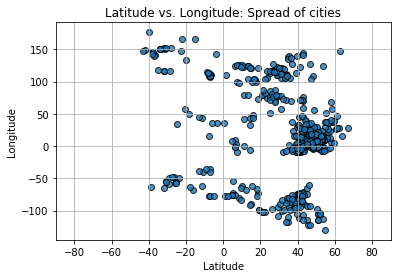

In [8]:
plt.scatter(weather_df["Latitude"],
            weather_df["Longitude"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")

plt.title("Latitude vs. Longitude: Spread of cities")
plt.ylabel("Longitude")
plt.xlabel("Latitude")
plt.xlim((-90, 90))
plt.grid(True)

# Save Figure
plt.savefig("temperature.png")

plt.plot()
plt.show()


## Latitude vs. Temperature

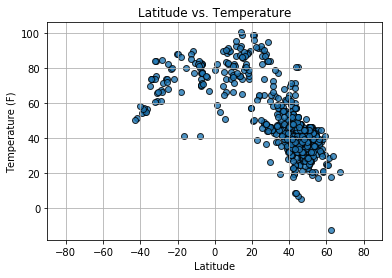

In [9]:
plt.scatter(x_axis_lat,
            y_axis_temp,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")

plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.xlim((-90, 90))
plt.grid(True)

# Save Figure
plt.savefig("temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity

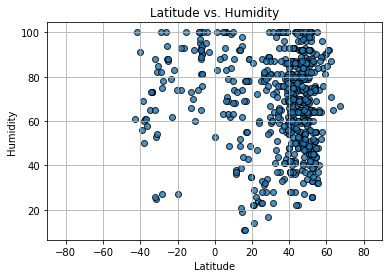

In [10]:
plt.scatter(x_axis_lat,
            y_axis_humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")


plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.xlim((-90, 90))
plt.grid(True)

# Save Figure
plt.savefig("humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness

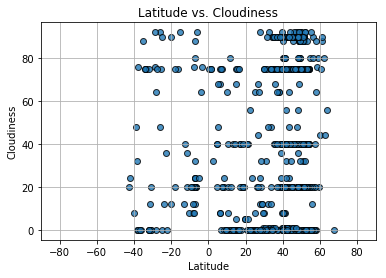

In [11]:
plt.scatter(x_axis_lat,
            y_axis_cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")

plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.xlim((-90, 90))
plt.grid(True)

# Save Figure
plt.savefig("cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed

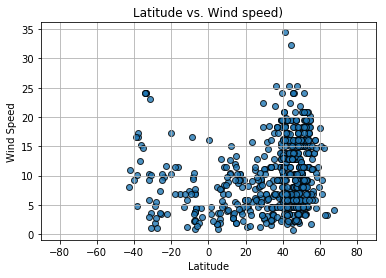

In [12]:
plt.scatter(x_axis_lat,
            y_axis_windspeed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")

plt.title("Latitude vs. Wind speed)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.xlim((-90, 90))
plt.grid(True)

# Save Figure
plt.savefig("wind speed.png")

# Show plot
plt.show()